In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from matplotlib import cm
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
sns.set_style('white')
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 500)
from matplotlib import cm

In [2]:
data = pd.read_csv(r'Olympics\athlete_events.csv')
regions = pd.read_csv(r"Olympics\noc_regions.csv")

In [3]:
data = data.merge(regions[["NOC","region"]],left_on="NOC",right_on="NOC",how = "left")

In [4]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 16 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
region    270746 non-null object
dtypes: float64(3), int64(2), object(11)
memory usage: 35.2+ MB


In [6]:
data.isnull().count()

ID        271116
Name      271116
Sex       271116
Age       271116
Height    271116
Weight    271116
Team      271116
NOC       271116
Games     271116
Year      271116
Season    271116
City      271116
Sport     271116
Event     271116
Medal     271116
region    271116
dtype: int64

In [7]:
tn = data.isnull().sum().sort_values(ascending=False)
pc = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([tn, pc], axis=1, keys=['total_missing', '%_missing'])
missing.head(5)

,total_missing,%_missing
Medal,231333,85.326207
Weight,62875,23.191180
Height,60171,22.193821
Age,9474,3.494445
region,370,0.136473


In [8]:
# There are some missing values in columns : Age, Height, Weight, Medal

In [9]:
athletes_all = data.groupby('Year')['ID'].nunique().reset_index()
athletes = data.groupby(['Year','Season'])['ID'].nunique().reset_index()

In [10]:
athletes.head(3)

,Year,Season,ID
0,1896,Summer,176
1,1900,Summer,1224
2,1904,Summer,650


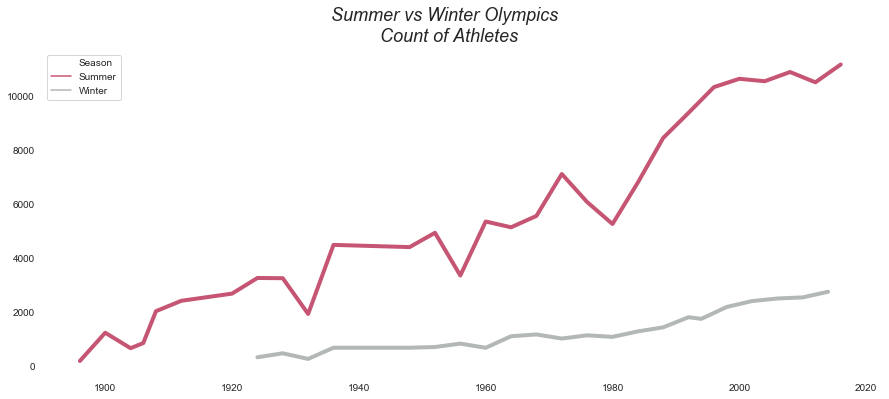

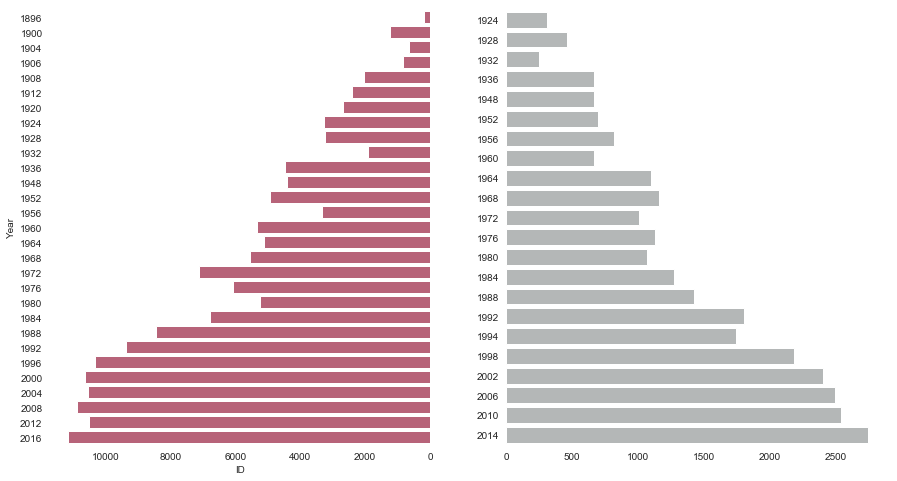

In [11]:
plt.figure(figsize=(15,6))
plt.suptitle('Summer vs Winter Olympics \n Count of Athletes',fontsize=18,style='italic' );
sns.lineplot(x='Year',y='ID',data=athletes,palette=['#c55572','#b3b7b8'],linewidth=4,hue='Season')
plt.xlabel('');
plt.ylabel('');
sns.despine(left=True, bottom=True)
fig, ax = plt.subplots(1,2,figsize=(15,8))
ax1 = sns.barplot(y='Year',x='ID',data=athletes[athletes['Season']=='Summer'],ax=ax[0],palette=['#c55572'],orient='h')
#ax1.invert_yaxis()  # labels read top-to-bottom
ax1.invert_xaxis()  # labels read top-to-bottom
sns.despine(left=True, bottom=True)
ax2 = sns.barplot(y='Year',x='ID',data=athletes[athletes['Season']=='Winter'],ax=ax[1],palette=['#b3b7b8'],orient='h')
#ax2.invert_yaxis()  # labels read top-to-bottom
plt.xlabel('')
plt.ylabel('')
sns.despine(left=True, bottom=True);

In [12]:
smin,smax,wmin,wmax = athletes[athletes['Season']=='Summer']['ID'].min(), athletes[athletes['Season']=='Summer']['ID'].max(), athletes[athletes['Season']=='Winter']['ID'].min(), athletes[athletes['Season']=='Winter']['ID'].max()
print(f"First Summer Olympics (1896) : {smin} unique participants\nLast Summer Olympics (2016) :{smax} praticipants\nFirst Winter Olympics(1924): {wmin} unique participants\nLast Winter Olympics (2014) there were {wmax} praticipants")

First Summer Olympics (1896) : 176 unique participants
Last Summer Olympics (2016) :11179 praticipants
First Winter Olympics(1924): 252 unique participants
Last Winter Olympics (2014) there were 2745 praticipants


In [13]:
athletes_sex_summer = data[data['Season']=='Summer'].groupby(['Year','Sex'])['ID'].nunique().reset_index()
athletes_sex_winter = data[data['Season']=='Winter'].groupby(['Year','Sex'])['ID'].nunique().reset_index()

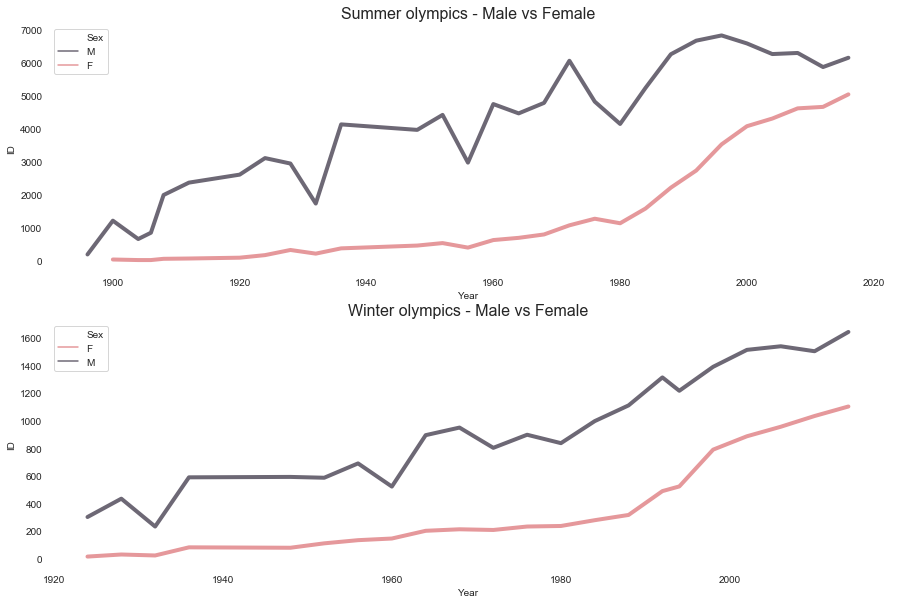

In [14]:
fig, ax = plt.subplots(2,1,figsize=(15,10))
ax1 = sns.lineplot(x='Year',y='ID',data=athletes_sex_summer,ax=ax[0],palette=['#6D6875','#E5989B'],hue='Sex',linewidth=4)
ax1.set_title('Summer olympics - Male vs Female',fontsize=16)
ax2 = sns.lineplot(x='Year',y='ID',data=athletes_sex_winter,ax=ax[1],palette=['#E5989B','#6D6875'],hue='Sex',linewidth=4)
ax2.set_title('Winter olympics - Male vs Female',fontsize=16)
sns.despine(left=True, bottom=True)

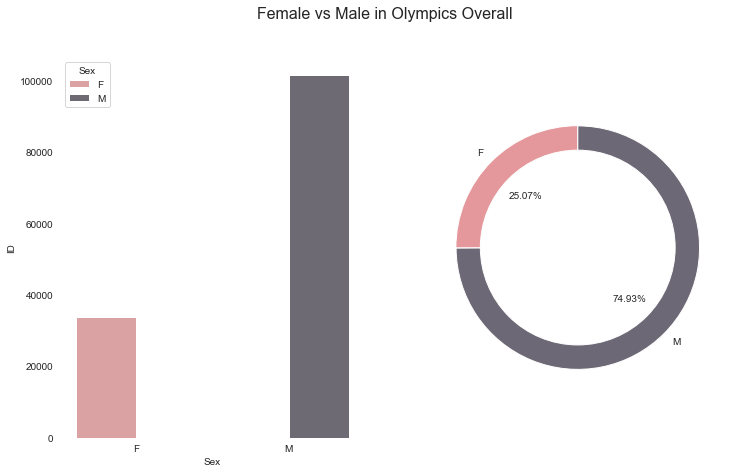

<Figure size 432x288 with 0 Axes>

In [18]:
f, ax = plt.subplots(1,2,figsize=(12,7));
sns.barplot(x=data.groupby(['Sex'])['ID'].nunique().reset_index()['Sex'], y='ID',data=data.groupby(['Sex'])['ID'].nunique().reset_index(),palette=['#E5989B','#6D6875'],ax=ax[0],hue='Sex')
sns.despine(left=True, bottom=True);
my_circle=plt.Circle( (0,0), 0.8, color='white');
names=data.groupby(['Sex'])['ID'].nunique().index.tolist();
size=data.groupby(['Sex'])['ID'].nunique().values.tolist();
plt.pie(size, labels=names, colors=['#E5989B','#6D6875'],autopct='%1.2f%%',explode = (0.001,0.001),startangle=90);
p=plt.gcf();
p.gca().add_artist(my_circle);
f.suptitle("Female vs Male in Olympics Overall", fontsize=16);
plt.show();
sns.despine(left=True, bottom=True);

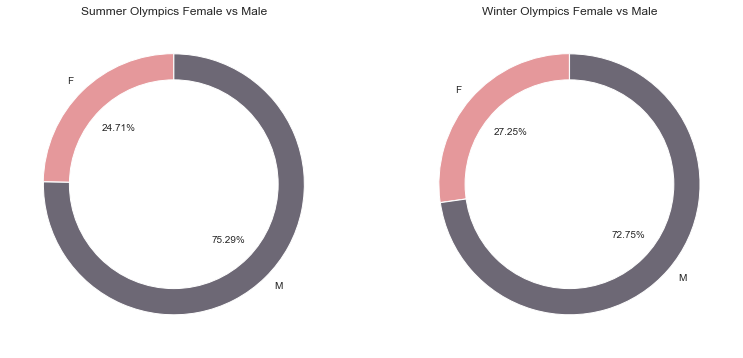

In [32]:
plt.figure(figsize=(13,6))
plt.subplot(121)
data[data['Season']=='Summer'].groupby(['Sex'])['ID'].nunique().plot.pie(autopct='%1.2f%%',
                                                                         explode = (0.001,0.001),startangle=90,
                                                                         colors=['#E5989B','#6D6875']) 
plt.ylabel("")
circ = plt.Circle((0,0),.8,color = "white")
plt.gca().add_artist(circ)
plt.title("Summer Olympics Female vs Male")

plt.subplot(122)
data[data['Season']=='Winter'].groupby(['Sex'])['ID'].nunique().plot.pie(autopct='%1.2f%%',
                                                                         explode = (0.001,0.001),startangle=90,
                                                                         colors=['#E5989B','#6D6875'])
plt.ylabel("")
circ = plt.Circle((0,0),.8,color = "white")
plt.gca().add_artist(circ)
plt.title("Winter Olympics Female vs Male")

plt.show()

In [33]:
# We can see that there is more female participates in Winter Olympics then in Summer. Ratio is bigger in Winter.

In [43]:
cntr = data.groupby(['Year','Season'])['NOC'].nunique().reset_index()

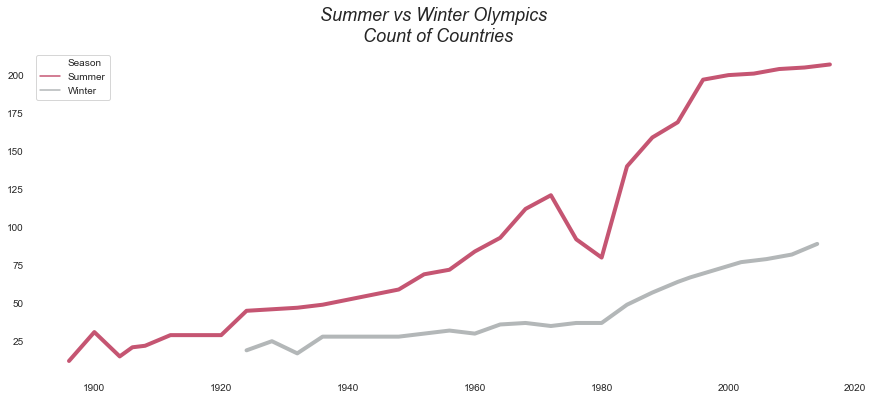

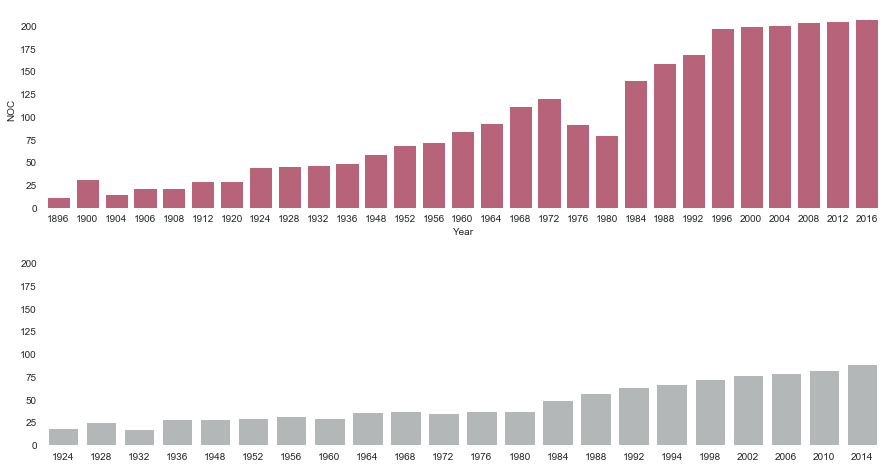

In [57]:
plt.figure(figsize=(15,6))
plt.suptitle('Summer vs Winter Olympics \n Count of Countries',fontsize=18,style='italic' );
sns.lineplot(x='Year',y='NOC',data=cntr,palette=['#c55572','#b3b7b8'],linewidth=4,hue='Season')
plt.xlabel('');
plt.ylabel('');
sns.despine(left=True, bottom=True)
fig, ax = plt.subplots(2,1,figsize=(15,8),sharey=True)
ax1 = sns.barplot(x='Year',y='NOC',data=cntr[cntr['Season']=='Summer'],ax=ax[0],palette=['#c55572'],orient='v')
sns.despine(left=True, bottom=True)
ax2 = sns.barplot(x='Year',y='NOC',data=cntr[cntr['Season']=='Winter'],ax=ax[1],palette=['#b3b7b8'],orient='v')
plt.xlabel('')
plt.ylabel('')
sns.despine(left=True, bottom=True);